折腾半天，我又回来了，我将先用numpy实现一次标准战役推断的MH算法。

## 简化问题

试想地图上分布着一些单位，我们的单位单位位置是已知的，对方的单位数量已知（这个简化之后可以放松），但不知道位置，但它们的位置可以通过它们
与我们的单位的接触来判断，接触是在某些位置上发生离散的“战斗事件”来决定的，这里战斗事件是同质的，我们之后后考虑事件的大小和长度以及
具体时间的影响。

战役的发生的数量是有限的

ummmmmmmmmmmmmm，还是不用MH算法了，还是用最早学过的那种直接离散化方法吧。。比较低维的问题还是能处理的，高维的直接分开来做，反正变分推断
只会错的更大，而MCMC只会根本连有效结果都没有。

### 更进一步的简化

我们将地图上的战斗事件看成是如此独立的采样出来的（实际上显然不应该独立。。），这个分布的target分布的每个点的“未标准化密度”由它与
最近的友方与敌方单位对此放出的正态密度之乘积计算得，即

$$
P(x,y) \propto \max_i p_{1i}(x,y) \max_j p_{2j}(x,y)
$$

其中

$$
p_{st} \propto \exp(-\frac{1}{2}((x-x_{st})^2+(y-y_{st})^2))
$$

其中$s$取1和2时分别表示友方和敌方，$t$表示对应位置的下标。之后为了简便当成上面的符号为等号到时候再标准化。
为了使得数值稳定一些我们照常取一下对数：

$$
\log P(x,y) = (-\frac{1}{2})(\min_{i} ((x-x_{1i})^2 + (y-y_{1i})^2) + \min_j ((x-x_{2j})^2+(y-y_{2j})^2))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
np.random.seed(23)

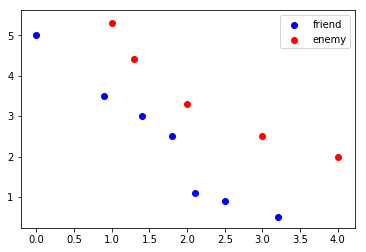

In [3]:
friendly_point = np.array([[0.0,5],[0.9,3.5],[1.4,3.0],[1.8,2.5],[2.1,1.1],[2.5,0.9],[3.2,0.5]])
enemy_point = np.array([[1.0,5.3],[1.3,4.4],[2.0,3.3],[3.0,2.5],[4.0,2.0]])

plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.legend()
plt.show()

In [4]:
_x = np.linspace(-1,5,100)
_y = np.linspace(0,6,100)
x,y = np.meshgrid(_x,_y)
x = x.flatten()
y = y.flatten()

In [5]:
friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)

In [6]:
chance = np.exp(-0.5*(friendly_chance+enemy_chance))

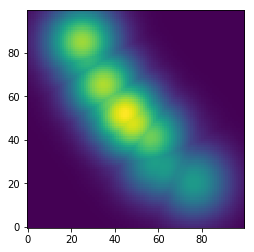

In [30]:
#plt.figure(figsize=(16,9))
plt.imshow(chance.reshape([_x.shape[0],_y.shape[0]]),origin='lower')

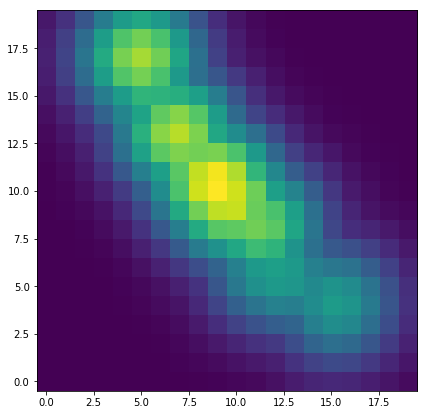

In [35]:
plt.figure(figsize=(7,7))
plt.imshow(chance.reshape([_x.shape[0],_y.shape[0]])[::5,::5],origin='lower')

(50, 50)

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(chance.reshape([_x.shape[0],_y.shape[0]]),origin='lower')

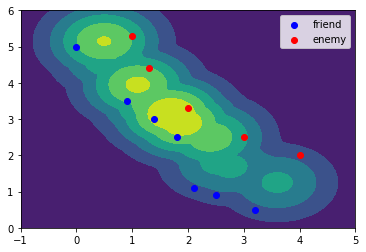

In [8]:
plt.contourf(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.legend()
plt.show()

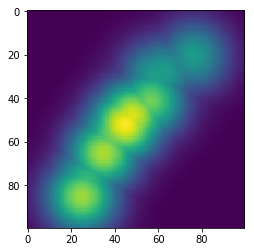

In [15]:
plt.imshow(chance.reshape([_x.shape[0],_y.shape[0]]))

ValueError: 'norm' must be an instance of 'mcolors.Normalize'

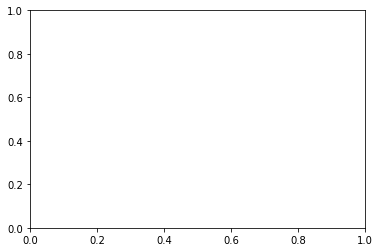

In [9]:
plt.imshow(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.legend()
plt.show()

In [9]:
np.sum(chance)

2091.494483935059

In [10]:
stats.rv_discrete

scipy.stats._distn_infrastructure.rv_discrete

In [11]:
stats.rv_discrete(values=[[1,2,3,4],[0.1,0.2,0.3,0.4]]).rvs(size=10)

array([3, 4, 4, 2, 2, 4, 2, 3, 4, 3])

In [12]:
# stats.rv_discrete(values=[["frog","toad",3,4],[0.1,0.2,0.3,0.4]]).rvs(size=10)

In [13]:
prob = chance / chance.sum()

In [14]:
xy = np.array([x,y]).transpose()

In [15]:
battle = xy[np.random.choice(len(xy),10,p=prob)]

In [16]:
x_step = _x[1] - _x[0]
y_step = _y[1] - _y[0]

In [17]:
x_noise = stats.uniform(-x_step/2,x_step/2).rvs(10)
y_noise = stats.uniform(-y_step/2,x_step/2).rvs(10)

battle_x = battle[:,0] + x_noise
battle_y = battle[:,1] + y_noise

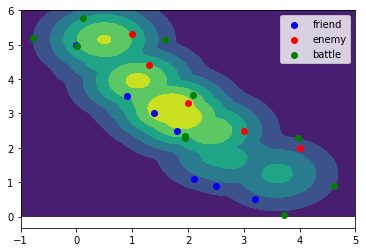

In [18]:
plt.contourf(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.legend()
plt.show()

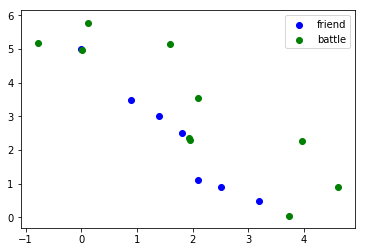

In [19]:
# 事实上你能看到的

#plt.contourf(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
#plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.legend()
plt.show()

看到上面那张图大概可以推断敌人可能也在相同的线上，但我们需要比较精确地估计，为了避免在高维的参数空间上游走或者格点数值积分。考虑变分
推断，我们的目标是直接近似五个敌人地点的后验分布。比如用10个均值，5个标准差建模5个正态分布。然后利用平均场假设构建我们的近似后验分布：

$$
\prod_{j=1}^5 p_{2j}(x,y \mid D) = p(x_{21},\dots,x_{25},y_{21},\dots,y_{25} \mid D)
$$

然后优化（减小）原后验条件分布与近似分布的KL散度来使得两者接近，其中任意P,Q分布的KL散度定义为：

$$
D_{\text{KL}}(P||Q) = -\sum_i p(i) \log \frac{Q(i)}{P(i)}
$$

为了方便计算，考虑近似分布与原条件分布的KL散度

$$
D_{\text{KL}}(Q||P\mid D) = -\sum_i Q(i) \log \frac{P(i \mid D)}{Q(i)} =  \sum_i Q(i) \log \frac{Q(i)P(D)}{P(i, D)} = 
\sum_i Q(i) (\log \frac{Q(i)}{P(i, D)} + \log P(D)) = \sum_i Q(i) \log \frac{Q(i)}{P(i, D)} + \log P(D)
$$

变分推断的变分本来是指从函数族里选坠吼来拟合，要的就是相对脱离参数，不过这里又把它重新参数化了。实际上我们的目标函数只有优化
最右边的第一个项，此项也被称为变分自由能$L(Q)$，由于$\log P(D)$不变，降低KL散度就与降低变分自由能$L(Q)$等价。从而我们可以再度利用
那些基于梯度的算法进行直接优化。

注意上式的$i$对应着x,y而不是参数空间（MCMC和格点数值积分就要直接处理参数空间了），
求和对应着积分。当然这里既然只有二维完全可以离散化化积分为求和。

下面的计算中我们设10个均值的先验为-10,10的均匀分布，而方差为0到10的均匀分布（Edward里有个例子就那么设的）。它的生成模型是首先在
先验分布里抽几个参数，然后以这些参数生成5个数据点。它的后验分布是给定5个数据点后对参数（相当于隐变量）的后验分布提供了信息，
我们可以



（一个月后）不不不，为了赶论文初稿我们先搞个极大似然估计，又是老套路，写个坑爹优化方程然后扔给优化器优化

In [20]:
friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)
chance = np.exp(-0.5*(friendly_chance+enemy_chance))

In [35]:
def chance_f(enemy_point_flatten):
    # 外部参数有battle_x，battle_y,friendly_point。我们要导入一些enemy_point的flatten向量作为自变量以供优化
    enemy_point = enemy_point_flatten.reshape((-1,2))
    x,y = battle_x,battle_y
    friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
    enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)
    chance = np.exp(-0.5*(friendly_chance+enemy_chance))
    return np.log(chance).sum()

In [22]:
from scipy.optimize import minimize

In [23]:
x0 = np.random.random(enemy_point.shape[0]*2)

In [24]:
res = minimize(lambda x:-chance_f(x), x0)

In [25]:
enemy_point_est = res.x.reshape((-1,2))

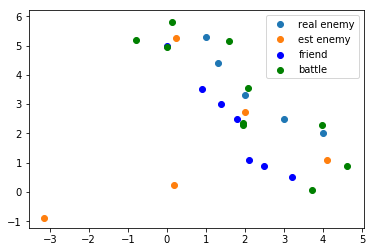

In [26]:
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
#plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.plot(enemy_point[:,0],enemy_point[:,1],'o',label="real enemy")
plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.plot(enemy_point_est[:,0],enemy_point_est[:,1],'o',label="est enemy")
plt.legend()
plt.show()

可以预见的，类似过拟合的结果，一些点因为仅因为插在那“效能最高”就落到那了。一种粗暴的解决这一问题的方式是赋予那些我们觉得应该在那的位置以较大
的先验概率以抑制这一情况出现。

In [36]:
def chance_f2(enemy_point_flatten):
    # 外部参数有battle_x，battle_y,friendly_point。我们要导入一些enemy_point的flatten向量作为自变量以供优化
    enemy_point = enemy_point_flatten.reshape((-1,2))
    x,y = battle_x,battle_y
    friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
    enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)
    chance = (-0.5*(friendly_chance+enemy_chance)).sum()
    return chance

In [152]:
def chance_f3(enemy_point_flatten, split=False):
    enemy_point = enemy_point_flatten.reshape((-1,2))
    x,y = battle_x,battle_y
    friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
    enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)
    chance = (-0.5*(friendly_chance+enemy_chance)).sum()
    #prior = (1.0/(1 + np.exp(-0.1*enemy_point.sum(axis=1)))).sum()  # 先验本身是乘的，这里chance已经对数化了，把prior也看成已经对数化了
    #prior = (-2.0/(-5+enemy_point.sum(axis=1))).sum()
    #prior = -1*np.exp(-10*(enemy_point.sum(axis=1)-5)).sum()
    prior = -1*np.exp(-1*(enemy_point)).sum()
    #prior = 0.0
    if split:
        return chance, prior
    return chance + prior

In [39]:
chance_f(x0)

-72.80478222994854

In [32]:
chance_f(enemy_point.flatten())

-12.163436436636768

In [33]:
chance_f(res.x)

-9.21240234953547

In [37]:
chance_f2(enemy_point.flatten())

-12.16343643663677

In [38]:
chance_f2(res.x)

-9.212402349535468

In [48]:
chance_f3(x0)

-70.17154879685928

In [49]:
chance_f3(res.x)

-6.424485381928729

In [50]:
chance_f3(enemy_point.flatten())

-8.962908790091193

In [153]:
res3 = minimize(lambda x:-chance_f3(x), x0)

In [154]:
enemy_point_est3 = res3.x.reshape((-1,2))

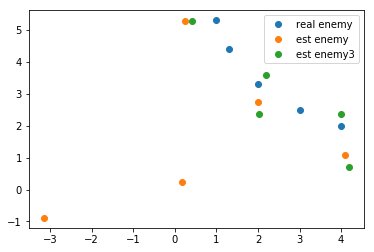

In [155]:
#plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
#plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.plot(enemy_point[:,0],enemy_point[:,1],'o',label="real enemy")
#plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.plot(enemy_point_est[:,0],enemy_point_est[:,1],'o',label="est enemy")
plt.plot(enemy_point_est3[:,0],enemy_point_est3[:,1],'o',label="est enemy3")
plt.legend()
plt.show()

这个效果不错，加了个没什么道理的先验——倒不如说是优化的障碍函数或者正则项。即给予每个坐标分量一个大于0惩罚几乎没有，小于0惩罚指数级增大的
“先验项”

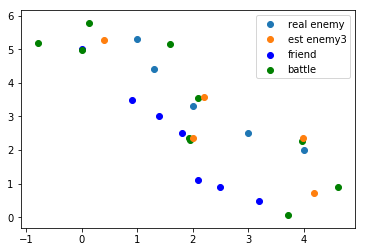

In [157]:
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
#plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.plot(enemy_point[:,0],enemy_point[:,1],'o',label="real enemy")
plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.plot(enemy_point_est3[:,0],enemy_point_est3[:,1],'o',label="est enemy3")
plt.legend()
plt.show()

果然效果不知道高到哪里去，下面我们给出一个有道理的先验的解释，以回避这看似过强的人工性/指导性。

$$
\log prior = \sum_i (-\exp(-x_i) - \exp(-y_i)) \\
prior = \exp (\log prior) = \exp(\sum_i (-\exp(-x_i) - \exp(-y_i))) = \prod_i \exp(-\exp(-x_i))\prod_i \exp(-\exp(-y_i))
$$

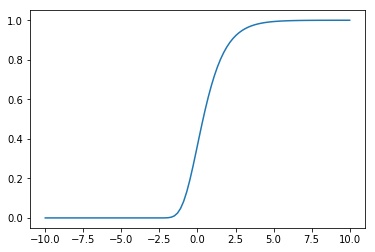

In [159]:
def plot_exp_neg_exp(x):
    plt.plot(x, np.exp(-np.exp(-x)))
    
plot_exp_neg_exp(np.linspace(-10,10,100))

可以看出这种$\exp(-\exp(-x))$函数的概率解释类似逻辑斯克函数。它给予我们给一个区域极大“惩罚”——极低先验的同时给予另一个区域区别不大的先验。
这正是我们有时所想要的。

如此，极大后验估计MAP就有了（极大似然估计——平等先验被证明是不可用的）。接下来我们来考虑如何生成一个一个点上有一个敌人单位的后验概率。
这个问题并没有看上去那么简单，比如如果我们假设只有1个敌人单位的话，一个两个战役的情况可能会推出敌人在战役发生地中间，有2个则为两个敌人单位
分属两边概率最大。虽然因为对称性问这个问题依然是有意义的，但如何生成一个合理的结果却不是很明显，一个选择是把敌人数量也纳入一个分布中来解决
这个问题。那么一个点上敌人的后验概率应该是各个敌人数量取法与各取法下在该点的先验之积分或和。进一步的，虽然我们可以容易得到一个总的k个点的
具体分配的似然概率，但得到单个点的似然概率却涉及我们一直想回避的积分，虽然直觉上单个点的概率因为对称性似乎应该是一样的。

至少可以想到两个方法，一个是从MAP直接以KDE的方式散布出去，还有就是再加个隐变量层，把敌人位置也看成是泊松二维点过程抽出来的，我们用几个
参数限制那个敌人位置的独立抽样分布，然后估计极大似然或极大后验的参数分布，再把对应的位置分布直接画出来。

除此以外我们还要考虑控制区之类的视觉比定义更重要的东西，某种意义上。

## 运动态势

我们可以限制双方的运动方式，比如单位总是按照某个固定速度沿着某个方向移动，也可以设这个速度为0.从而我们可以考虑一个时间段（在时间段内方向不变）
敌人在各时间的位置，计算在那个时间的战役发生似然性。从而估计出方向和速度，这样就可以画出一些箭头了（当然你得靠的够近才能画出箭头。）